In [761]:
# IMPORT LIBRARIES

import numpy as np													# Numerical computations
import pandas as pd 												# Data structures
import matplotlib.pyplot as plt										# Statistic visualizations
import matplotlib.ticker as mticker									# Ticker formatting
from pandas.plotting import scatter_matrix							# Scatter matrix
import seaborn as sns												# Statistic visualizations
import statsmodels.api as sm										# Model construction
from scipy import stats			                                    # Statistics
import statsmodels.api as sm                                        # Model construction
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV	# Regression model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder      # Assigns numeric ranges 0-1
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier					# Decision Trees
from sklearn.model_selection import train_test_split, KFold, GridSearchCV				# Test models
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, classification_report		# Model accuracy
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost
from sklearn.datasets import load_iris, load_diabetes
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
#from utils import pipeline
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [762]:
# Step 2: Load the data
df = pd.read_csv("anon_cust_data_1.csv")

In [763]:
df.drop(columns='Unnamed: 0', inplace=True)

In [764]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [766]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [767]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [769]:
# cols_to_encode = ['gender','Partner','Dependents','PhoneService','MultipleLines',
#                   'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
#                   'StreamingTV','StreamingMovies','PaperlessBilling','InternetService', 
#                   'Contract', 'PaymentMethod','TotalCharges','Churn']


In [770]:
def change_to_no(dataframe: pd.DataFrame, replace: str, new_string: str) -> pd.DataFrame:
    """Changes any no [insert specific service here] to just no."""
    func_df = dataframe.copy()
    columns = func_df.columns
 
    for col in columns:
        if type(df[col][0]) != str:
            print(f"There is no '{replace}' in the {col} column.")
            pass
        else:
            func_df.loc[func_df[col] == replace, col] = new_string
    return func_df

In [771]:
df = change_to_no(df, 'No phone service', 'No')
df = change_to_no(df, 'No internet service', 'No')

There is no 'No phone service' in the SeniorCitizen column.
There is no 'No phone service' in the tenure column.
There is no 'No phone service' in the MonthlyCharges column.
There is no 'No internet service' in the SeniorCitizen column.
There is no 'No internet service' in the tenure column.
There is no 'No internet service' in the MonthlyCharges column.


In [772]:

category_maps = {}

for col in df.columns:
    if type(df[col][0]) != str:
         pass
    else:
        cat = pd.Categorical(df[col])
        df[col] = cat.codes
        category_maps[col] = dict(enumerate(cat.categories))

print(category_maps)


{'gender': {0: 'Female', 1: 'Male'}, 'Partner': {0: 'No', 1: 'Yes'}, 'Dependents': {0: 'No', 1: 'Yes'}, 'PhoneService': {0: 'No', 1: 'Yes'}, 'MultipleLines': {0: 'No', 1: 'Yes'}, 'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'}, 'OnlineSecurity': {0: 'No', 1: 'Yes'}, 'OnlineBackup': {0: 'No', 1: 'Yes'}, 'DeviceProtection': {0: 'No', 1: 'Yes'}, 'TechSupport': {0: 'No', 1: 'Yes'}, 'StreamingTV': {0: 'No', 1: 'Yes'}, 'StreamingMovies': {0: 'No', 1: 'Yes'}, 'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}, 'PaperlessBilling': {0: 'No', 1: 'Yes'}, 'PaymentMethod': {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}, 'TotalCharges': {0: ' ', 1: '100.2', 2: '100.25', 3: '100.35', 4: '100.4', 5: '100.8', 6: '100.9', 7: '1001.2', 8: '1001.5', 9: '1003.05', 10: '1004.35', 11: '1004.5', 12: '1004.75', 13: '1005.7', 14: '1006.9', 15: '1007.8', 16: '1007.9', 17: '1008.55', 18: '1008.7', 19: '1009.25', 20: '101.1', 21: '101.

In [773]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int8   
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int8   
 3   Dependents        7043 non-null   int8   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int8   
 6   MultipleLines     7043 non-null   int8   
 7   InternetService   7043 non-null   int8   
 8   OnlineSecurity    7043 non-null   int8   
 9   OnlineBackup      7043 non-null   int8   
 10  DeviceProtection  7043 non-null   int8   
 11  TechSupport       7043 non-null   int8   
 12  StreamingTV       7043 non-null   int8   
 13  StreamingMovies   7043 non-null   int8   
 14  Contract          7043 non-null   int8   
 15  PaperlessBilling  7043 non-null   int8   
 16  PaymentMethod     7043 non-null   int8   


In [775]:
for col, mapping in category_maps.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for gender: {0: 'Female', 1: 'Male'}
Mapping for Partner: {0: 'No', 1: 'Yes'}
Mapping for Dependents: {0: 'No', 1: 'Yes'}
Mapping for PhoneService: {0: 'No', 1: 'Yes'}
Mapping for MultipleLines: {0: 'No', 1: 'Yes'}
Mapping for InternetService: {0: 'DSL', 1: 'Fiber optic', 2: 'No'}
Mapping for OnlineSecurity: {0: 'No', 1: 'Yes'}
Mapping for OnlineBackup: {0: 'No', 1: 'Yes'}
Mapping for DeviceProtection: {0: 'No', 1: 'Yes'}
Mapping for TechSupport: {0: 'No', 1: 'Yes'}
Mapping for StreamingTV: {0: 'No', 1: 'Yes'}
Mapping for StreamingMovies: {0: 'No', 1: 'Yes'}
Mapping for Contract: {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
Mapping for PaperlessBilling: {0: 'No', 1: 'Yes'}
Mapping for PaymentMethod: {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
Mapping for TotalCharges: {0: ' ', 1: '100.2', 2: '100.25', 3: '100.35', 4: '100.4', 5: '100.8', 6: '100.9', 7: '1001.2', 8: '1001.5', 9: '1003.05', 10: '1004.35', 11: '10

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.008414       0.142948  0.142057   -0.024526  0.331941   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.017021      -0.038653  0.143106    0.080972  0.327203   
OnlineBackup     -0.013773       0.066572  0.141498    0.023671  0.360277   
DeviceProtection -0.002105       0.059428  0.153786    0.013963  0.360653   
TechSupport      -0.009212      -0.060625  0.119999    0.063268  0.324221   

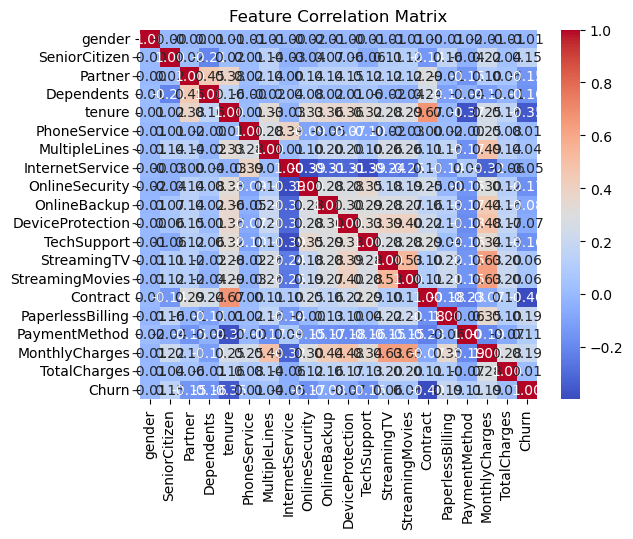

In [776]:
corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [777]:
def drop_a_column(df, model):
    results = {}
    for column in df.columns:
        if column == 'Churn':
            continue
        X = df.drop(columns=[column, 'Churn'])
        y = df['Churn']
        X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        acc_score = accuracy_score(y_test, y_pred)
        results[column] = acc_score
        print(f"Dropping DF Column '{column}' → {model.__class__.__name__}: {acc_score:.4f}")
    return results

In [778]:
def get_coef(df, model):
    results = {}
    
        
    
    X = df.drop(columns=['Churn'])
    y = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.3, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    acc_score = accuracy_score(y_test, y_pred)
    feature_names = X.columns
    try:
        importances = model.feature_importances_
        for name, importance in zip(feature_names, importances):
            print(f"{name}: {importance:.4f}")
    except:
        coefs = (model.coef_)
        for name, coef in zip(feature_names, model.coef_[0]):
            print(f"{name}: {coef}")
    # print(f"Dropping DF Column '{}' → {model.__class__.__name__}: {acc_score:.4f}")
    print(acc_score)

In [779]:
df.drop(columns=['Contract','TotalCharges'], inplace=True)

In [780]:
get_coef(df, model=LogisticRegression(random_state= 42))

gender: -0.07398382809841447
SeniorCitizen: 0.31127034463524866
Partner: 0.002787522880116104
Dependents: -0.2168281047031579
tenure: -3.0036532794006114
PhoneService: -1.2153941905603676
MultipleLines: 0.14034942234076206
InternetService: -0.13581363480714562
OnlineSecurity: -0.6926476358197764
OnlineBackup: -0.3583784838477156
DeviceProtection: -0.2387364601335284
TechSupport: -0.6441678919494911
StreamingTV: -0.24902708082209368
StreamingMovies: -0.023694737085738563
PaperlessBilling: 0.41079382724890945
PaymentMethod: 0.2105244261288736
MonthlyCharges: 3.91106556010303
0.8121154756270705


In [781]:
drop_a_column(df, model=LogisticRegression(random_state= 42))

Dropping DF Column 'gender' → LogisticRegression: 0.8126
Dropping DF Column 'SeniorCitizen' → LogisticRegression: 0.8079
Dropping DF Column 'Partner' → LogisticRegression: 0.8126
Dropping DF Column 'Dependents' → LogisticRegression: 0.8088
Dropping DF Column 'tenure' → LogisticRegression: 0.7728
Dropping DF Column 'PhoneService' → LogisticRegression: 0.8008
Dropping DF Column 'MultipleLines' → LogisticRegression: 0.8112
Dropping DF Column 'InternetService' → LogisticRegression: 0.8135
Dropping DF Column 'OnlineSecurity' → LogisticRegression: 0.8088
Dropping DF Column 'OnlineBackup' → LogisticRegression: 0.8088
Dropping DF Column 'DeviceProtection' → LogisticRegression: 0.8131
Dropping DF Column 'TechSupport' → LogisticRegression: 0.8093
Dropping DF Column 'StreamingTV' → LogisticRegression: 0.8145
Dropping DF Column 'StreamingMovies' → LogisticRegression: 0.8121
Dropping DF Column 'PaperlessBilling' → LogisticRegression: 0.8069
Dropping DF Column 'PaymentMethod' → LogisticRegression: 0

{'gender': 0.812588736393753,
 'SeniorCitizen': 0.8078561287269286,
 'Partner': 0.812588736393753,
 'Dependents': 0.8088026502602934,
 'tenure': 0.7728348319924279,
 'PhoneService': 0.8007572172266919,
 'MultipleLines': 0.8111689540937056,
 'InternetService': 0.8135352579271179,
 'OnlineSecurity': 0.8088026502602934,
 'OnlineBackup': 0.8088026502602934,
 'DeviceProtection': 0.8130619971604354,
 'TechSupport': 0.8092759110269758,
 'StreamingTV': 0.8144817794604827,
 'StreamingMovies': 0.8121154756270705,
 'PaperlessBilling': 0.8069096071935636,
 'PaymentMethod': 0.8092759110269758,
 'MonthlyCharges': 0.7860861334595362}

In [782]:
get_coef(df, model=RandomForestClassifier(random_state=42))

gender: 0.0349
SeniorCitizen: 0.0255
Partner: 0.0289
Dependents: 0.0255
tenure: 0.2776
PhoneService: 0.0086
MultipleLines: 0.0250
InternetService: 0.0503
OnlineSecurity: 0.0321
OnlineBackup: 0.0263
DeviceProtection: 0.0244
TechSupport: 0.0283
StreamingTV: 0.0202
StreamingMovies: 0.0208
PaperlessBilling: 0.0336
PaymentMethod: 0.0684
MonthlyCharges: 0.2696
0.7931850449597728


In [783]:
drop_a_column(df, model=RandomForestClassifier(random_state= 42))

Dropping DF Column 'gender' → RandomForestClassifier: 0.7946
Dropping DF Column 'SeniorCitizen' → RandomForestClassifier: 0.7832
Dropping DF Column 'Partner' → RandomForestClassifier: 0.7918
Dropping DF Column 'Dependents' → RandomForestClassifier: 0.7965
Dropping DF Column 'tenure' → RandomForestClassifier: 0.7520
Dropping DF Column 'PhoneService' → RandomForestClassifier: 0.7960
Dropping DF Column 'MultipleLines' → RandomForestClassifier: 0.7885
Dropping DF Column 'InternetService' → RandomForestClassifier: 0.7970
Dropping DF Column 'OnlineSecurity' → RandomForestClassifier: 0.7937
Dropping DF Column 'OnlineBackup' → RandomForestClassifier: 0.7880
Dropping DF Column 'DeviceProtection' → RandomForestClassifier: 0.7866
Dropping DF Column 'TechSupport' → RandomForestClassifier: 0.7894
Dropping DF Column 'StreamingTV' → RandomForestClassifier: 0.7993
Dropping DF Column 'StreamingMovies' → RandomForestClassifier: 0.7908
Dropping DF Column 'PaperlessBilling' → RandomForestClassifier: 0.792

{'gender': 0.7946048272598202,
 'SeniorCitizen': 0.7832465688594415,
 'Partner': 0.7917652626597255,
 'Dependents': 0.79649787032655,
 'tenure': 0.7520113582584004,
 'PhoneService': 0.7960246095598675,
 'MultipleLines': 0.7884524372929484,
 'InternetService': 0.7969711310932324,
 'OnlineSecurity': 0.7936583057264552,
 'OnlineBackup': 0.7879791765262659,
 'DeviceProtection': 0.7865593942262187,
 'TechSupport': 0.7893989588263133,
 'StreamingTV': 0.7993374349266446,
 'StreamingMovies': 0.7908187411263606,
 'PaperlessBilling': 0.792238523426408,
 'PaymentMethod': 0.791292001893043,
 'MonthlyCharges': 0.7860861334595362}

In [784]:
param_grid = {
    'max_iter': np.linspace(50, 200, 50, dtype=int),
    'penalty' : ['l1', 'l2', 'elasticnet']
}

X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state= 42)
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n--- BEST PARAMETERS AFTER GRID SEARCH ---")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("\n--- MODEL EVALUATION AFTER TUNING ---")
print("Accuracy:", accuracy_best)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))



--- BEST PARAMETERS AFTER GRID SEARCH ---
{'max_iter': np.int64(56), 'penalty': 'l2'}

--- MODEL EVALUATION AFTER TUNING ---
Accuracy: 0.808329389493611

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver 

In [ ]:
param_grid = {
    'max_iter': np.linspace(50, 200, 50, dtype=int),
    'penalty' : ['l1', 'l2', 'elasticnet']
}

X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state= 42)
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n--- BEST PARAMETERS AFTER GRID SEARCH ---")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("\n--- MODEL EVALUATION AFTER TUNING ---")
print("Accuracy:", accuracy_best)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))



--- BEST PARAMETERS AFTER GRID SEARCH ---
{'max_iter': np.int64(56), 'penalty': 'l2'}

--- MODEL EVALUATION AFTER TUNING ---
Accuracy: 0.808329389493611

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gnoel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver 